# Orlando - Clissificação Binária - Brest Cancer - Simples

- Base de dados: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [14]:
# Importação das bibliotecas principais
import pandas as pd  # Manipulação de dados tabulares com DataFrames
from sklearn.model_selection import train_test_split  # Separação entre treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Avaliação do modelo
import tensorflow as tf  # Framework para deep learning
from tensorflow.keras.models import Sequential  # Modelo sequencial (camada após camada)
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. Carregamento dos dados
# --------------------------

# Leitura das variáveis independentes (entradas do modelo)
X = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\entradas_breast.csv')

# Leitura da variável dependente (saída ou classe: 0 = benigno, 1 = maligno)
y = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\saidas_breast.csv')

# ----------------------------------
# 2. Divisão dos dados em treino e teste
# ----------------------------------

# Separação de 75% para treino e 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verificação dos formatos dos dados (linhas e colunas)
print("Shape do treino:", X_train.shape, y_train.shape)
print("Shape do teste:", X_test.shape, y_test.shape)

# Dica prática: para definir a quantidade de neurônios em camadas ocultas, uma heurística comum é:
# (número de entradas + número de saídas) / 2. Neste caso, temos 30 entradas e 1 saída.
print(f"O total de neurônios na camada intermediária será: {round((30 + 1) / 2)}")

# ----------------------------------
# 3. Construção da Rede Neural
# ----------------------------------

# O modelo Sequential cria uma pilha linear de camadas
rede_neural = Sequential([

    # Camada de entrada: espera vetores com 30 variáveis (características)
    tf.keras.layers.InputLayer(shape=(30,)),

    # Primeira camada oculta (hidden layer)
    # - 16 neurônios
    # - Função de ativação ReLU (Retified Linear Unit): introduz não-linearidade
    # - Inicialização aleatória dos pesos com distribuição uniforme
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),

    # Segunda camada oculta (também com 16 neurônios)
    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='random_uniform'),

    # Camada de saída
    # - Apenas 1 neurônio (classificação binária)
    # - Função de ativação sigmoide: retorna um valor entre 0 e 1 (probabilidade)
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Exibe o resumo da arquitetura: número de parâmetros, camadas e formas
rede_neural.summary()


Shape do treino: (426, 30) (426, 1)
Shape do teste: (143, 30) (143, 1)
O total de neurônios na camada intermediária será: 16


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.5562 - loss: 1.0533 - val_binary_accuracy: 0.6154 - val_loss: 0.5652
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5922 - loss: 0.5864 - val_binary_accuracy: 0.7413 - val_loss: 0.5832
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7244 - loss: 0.5194 - val_binary_accuracy: 0.7413 - val_loss: 0.5963
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7839 - loss: 0.4677 - val_binary_accuracy: 0.8811 - val_loss: 0.3818
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8473 - loss: 0.4055 - val_binary_accuracy: 0.8462 - val_loss: 0.4634
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8499 - loss: 0.5078 - val_binary_accuracy: 0.8322 - val_loss: 0.4272
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8013 - loss: 0.4219 - val_binary_accuracy: 0.7203 - val_loss: 0.8101
Epoch 8/100
4

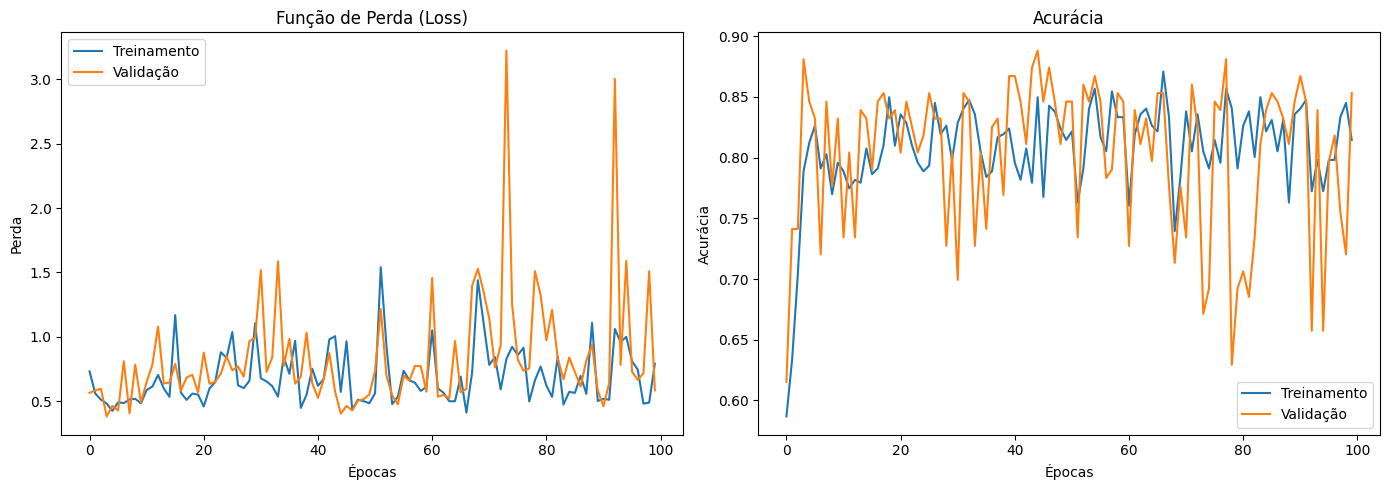

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Acurácia: 0.8531


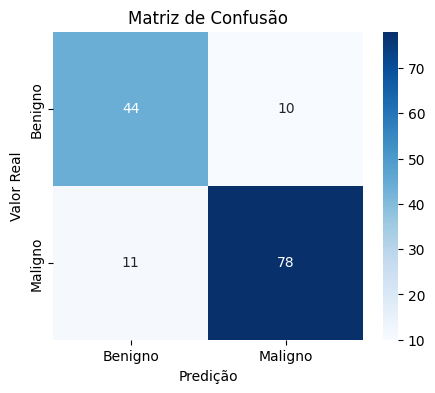


Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.80      0.81      0.81        54
     Maligno       0.89      0.88      0.88        89

    accuracy                           0.85       143
   macro avg       0.84      0.85      0.84       143
weighted avg       0.85      0.85      0.85       143


Avaliação final com dados de teste:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8603 - loss: 0.5415 


[0.5847296118736267, 0.8531468510627747]

In [15]:
# 4. Compilação do modelo
# - Adam: otimizador robusto, combina RMSprop e Momentum
# - binary_crossentropy: função de perda para classificação binária
# - binary_accuracy: métrica de acurácia binária
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)

rede_neural.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

# 5. Treinamento da rede
# - batch_size: número de amostras por atualização do gradiente
# - epochs: número total de vezes que o modelo verá todo o dataset de treino
history = rede_neural.fit(X_train, y_train,
                    batch_size=10,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    verbose=1)

# 6. Visualização do desempenho ao longo das épocas
plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Função de Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Treinamento')
plt.plot(history.history['val_binary_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Avaliação do modelo
# Gera previsões (valores entre 0 e 1), depois aplica threshold > 0.5
predictions = rede_neural.predict(X_test)
predictions = (predictions > 0.5)

# 8. Métricas de avaliação
# Acurácia
acc = accuracy_score(y_test, predictions)
print(f'\nAcurácia: {acc:.4f}')

# Matriz de Confusão
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório detalhado (Precision, Recall, F1-Score)
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions, target_names=['Benigno', 'Maligno']))

# 9. Avaliação final com dados de teste
print("\nAvaliação final com dados de teste:")
rede_neural.evaluate(X_test, y_test, verbose=1)

# (Opcional) 10. Salvar o modelo treinado
# model.save('modelo_classificacao_mama.h5')

### Considerações:

O treinamento do modelo apresentou um comportamento oscilatório tanto na função de perda (loss) quanto na acurácia, tanto para os dados de treinamento quanto para os de validação. Essas flutuações são especialmente visíveis ao longo das 100 épocas, o que pode indicar a sensibilidade do modelo às atualizações de gradiente, sobretudo considerando o pequeno tamanho do batch_size utilizado (10). Em geral, a função de perda não demonstrou um padrão de divergência crescente entre as curvas de treino e validação, sugerindo que o modelo não sofreu overfitting severo. Entretanto, as oscilações constantes ao longo das épocas podem ser interpretadas como um indicativo de que há espaço para melhorias na estabilidade do treinamento.

A acurácia alcançada ao final do treinamento foi de aproximadamente 85,31%, valor reforçado pela métrica de acurácia fornecida pelo método model.evaluate, que retornou um desempenho de 86,03% e uma função de perda de 0,5415. Tais resultados demonstram que o modelo apresenta um bom poder preditivo geral, mesmo diante de pequenas instabilidades. A acurácia, por si só, é uma métrica limitada em contextos médicos, mas quando aliada à análise da matriz de confusão e das métricas de desempenho específicas por classe, oferece uma visão mais robusta sobre a performance da rede.

A matriz de confusão obtida revela que o modelo foi capaz de classificar corretamente 44 dos 54 casos benignos (verdadeiros negativos) e 78 dos 89 casos malignos (verdadeiros positivos), apresentando 10 falsos positivos e 11 falsos negativos. A presença de falsos negativos é particularmente preocupante em um contexto clínico, pois representa casos em que o modelo classificou pacientes com câncer como saudáveis. A proporção desses erros sugere que, embora o modelo tenha desempenho satisfatório, ajustes mais refinados são desejáveis para reduzir a ocorrência de falsos negativos — por exemplo, a alteração do threshold da função sigmoid, reduzindo-o de 0.5 para valores como 0.4, de modo a aumentar a sensibilidade (recall) da classe positiva.

O relatório de classificação complementa essa análise, mostrando um desempenho significativamente melhor na identificação da classe “maligno”, com valores de precision e recall de 0.89 e 0.88, respectivamente. Já a classe “benigno” apresentou valores de 0.80 em ambas as métricas. O F1-Score geral foi de 0.85, com médias ponderadas igualmente próximas a esse valor. Esses dados indicam que o modelo está mais eficaz na detecção da classe positiva (maligno), o que é coerente com a priorização comum em diagnósticos médicos, onde a detecção de casos com câncer deve ser maximizada, mesmo que isso gere um aumento nos falsos positivos.

Diante desses resultados, é possível concluir que a rede neural desenvolvida apresenta desempenho satisfatório para uma primeira versão de modelo de classificação binária voltado à detecção de câncer de mama. Entretanto, os indícios de instabilidade durante o treinamento, além da ocorrência de falsos negativos, apontam para a necessidade de estratégias de refinamento. Recomenda-se a normalização dos dados de entrada por meio de técnicas como StandardScaler, o ajuste do tamanho do batch, a introdução de mecanismos como Early Stopping e ReduceLROnPlateau, além da consideração de técnicas de validação cruzada para melhor generalização. A inclusão de curvas ROC e AUC também pode enriquecer a avaliação, fornecendo uma visão mais precisa sobre o compromisso entre sensibilidade e especificidade. Por fim, a análise indica um caminho promissor para aprimoramentos no modelo, sobretudo no que se refere ao equilíbrio entre desempenho e confiabilidade clínica.